In [1]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
def oracle(qc):
    """
    L'oracle va marquer le livre 3 c'est la représenation des regles de l'enigme
    :param qc: 
    :return: 
    """
    qc.x(0)
    qc.cz(0,1)
    qc.x(0)

In [3]:
def diffuser(qc):
    """
    le rôle du diffuser est d'amplifier les phases, si elles ne sont pas marquer alors les phases von se réduire, si elle est marquer alors la phase va augmenter. 
    :param qc: 
    :return: 
    """
    qc.h([0,1])
    qc.z([0,1])
    qc.cz(0,1)
    qc.h([0,1])

In [4]:
grover_circuit = QuantumCircuit(2)

In [5]:
# Step 1: On applique une porte de Hadamar sur les Qubits 0 et 1 
grover_circuit.h([0,1])
grover_circuit.barrier()

In [6]:
# Step 2: On appelle la fonction de l'oracle
oracle(grover_circuit)
grover_circuit.barrier()

In [7]:
# Step 3: On appelle la fonction de diffusion
diffuser(grover_circuit)

In [8]:
# On mesure 
grover_circuit.measure_all()

C:\Users\Carmo\PycharmProject\quantum-esgi\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


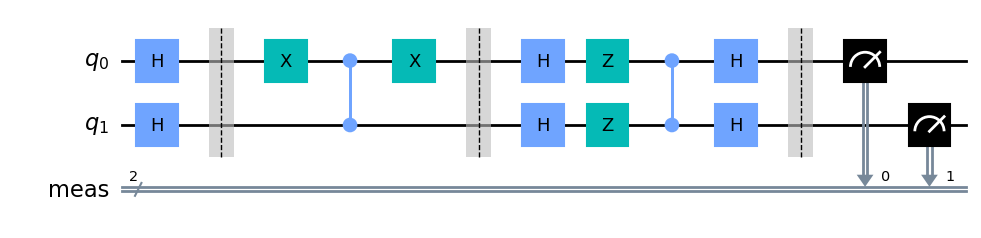

In [9]:
# On affiche le circuit
grover_circuit.draw(output='mpl')

In [10]:
# Simulons le circuit avec 1024 iterations
simulator = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, backend=simulator, shots=1024)

In [11]:
# montrons-les resultats des simulations
result = job.result()
counts = result.get_counts()

In [12]:
print(counts)

{'10': 1024}


### Sur l'histogramme on voit que le livre se situe sur la valeur 3 (10), comme il n'y que 2 Qubit on a une probabilité de 1 de mesurer 0 au Qubit n°1 et une probabilité de 1 de mesurer 1 au Qubit n°2. Si on avait eu plus de Qubit les probabilité aurient été plus dilué sur l'ensemble des Qubit

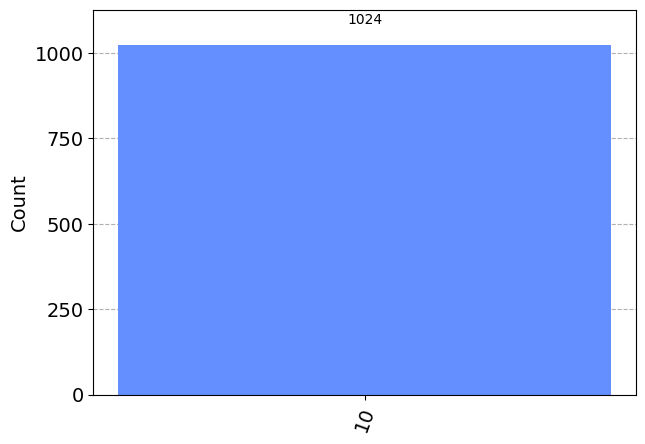

In [13]:
# Showing the result
plot_histogram(counts)